## Leonard Molano  |  Group 6  |   September 25, 2020
### Concrete Strength Prediction

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import tree
from scipy.stats import randint as sp_randint

%matplotlib inline 
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
concrete = pd.read_csv("concrete.csv")

## EDA

In [4]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [5]:
concrete.shape

(1030, 9)

In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [8]:
concrete.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

In [9]:
concrete.shape

(1030, 9)

In [10]:
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [11]:
concrete.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [12]:
concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [13]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [14]:
for i in concrete.columns:
    print(i,":")
    print()
    print(concrete[i].value_counts(normalize=True)*100)
    print()
    print()

cement :

425.00   1.94
362.60   1.94
251.40   1.46
446.00   1.36
310.00   1.36
         ... 
312.90   0.10
261.90   0.10
325.60   0.10
143.80   0.10
145.40   0.10
Name: cement, Length: 278, dtype: float64


slag :

0.00     45.73
189.00    2.91
106.30    1.94
24.00     1.36
20.00     1.17
          ... 
161.00    0.10
160.50    0.10
129.00    0.10
100.60    0.10
209.00    0.10
Name: slag, Length: 185, dtype: float64


ash :

0.00     54.95
118.30    1.94
141.00    1.55
24.50     1.46
79.00     1.36
          ... 
119.00    0.10
134.00    0.10
95.00     0.10
130.00    0.10
129.70    0.10
Name: ash, Length: 156, dtype: float64


water :

192.00   11.46
228.00    5.24
185.70    4.47
203.50    3.50
186.00    2.72
          ... 
165.00    0.10
237.00    0.10
166.70    0.10
191.30    0.10
184.40    0.10
Name: water, Length: 195, dtype: float64


superplastic :

0.00    36.80
11.60    3.59
8.00     2.62
7.00     1.84
6.00     1.65
         ... 
2.20     0.10
11.50    0.10
6.30     0.10
10.50

## Univarate Analysis

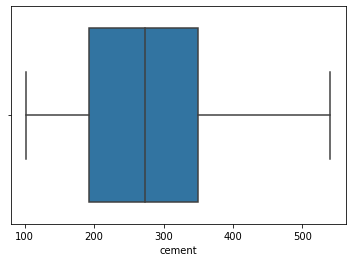

In [15]:
sns.boxplot(concrete['cement'])

`Cement weight data is fairly balanced, with no extreme outliers present`

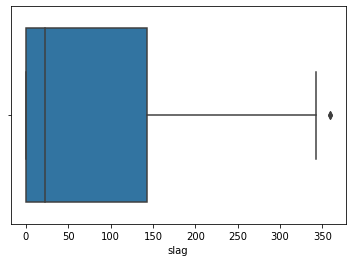

In [16]:
sns.boxplot(concrete['slag'])

`Blast Furnace Slag data is fairley skewed to right, with a few extreme outliers on the upper side.`

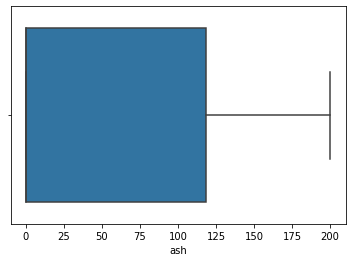

In [17]:
sns.boxplot(concrete['ash'])

`Fly Ash weight data is pretty balanced, with no extreme outliers present in the data.`

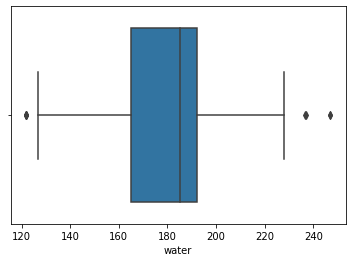

In [18]:
sns.boxplot(concrete['water'])

`Water weight data is fairly inbalanced, with a fair amount of outliers in both ranges. Data will definietly need to be normalized before processing it.`

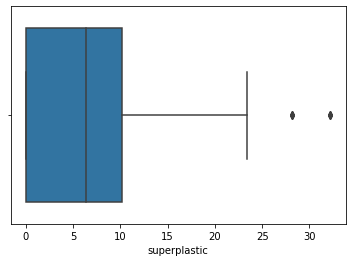

In [19]:
sns.boxplot(concrete['superplastic'])

`Superplasticizer data is skewed towards the right, with a couple of values as extreme outliers that will need to be normalized.`

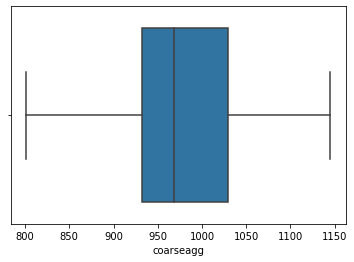

In [20]:
sns.boxplot(concrete['coarseagg'])

`Coarse Aggregate data is fairly balanced with no extreme outliers.`

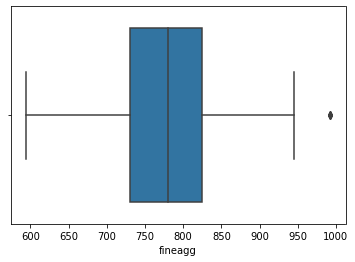

In [21]:
sns.boxplot(concrete['fineagg'])

 `Fine Aggregate data is fairly balance with only a few extreme outliers on the upper side.` 

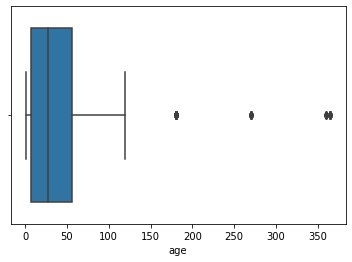

In [22]:
sns.boxplot(concrete['age'])

`Concrete Age is very imbalanced and skewed to the right. it also contains a high ammount of extreme outliers which will need to be dealt with.`

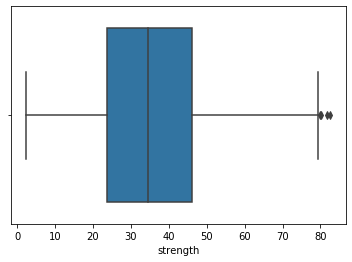

In [23]:
sns.boxplot(concrete['strength'])

`Concrete Compressive Strength data is fairly balanced, with a couple of extreme outliers to the right side.`

`They are a couple of variables with a fair amount of extreme outliers. For such cases we will take substitue those values with the median value for better processing. In addition a Standar scaler will be used to further help 'smooth'the data for processing. `

## Bi-Variate Analysis

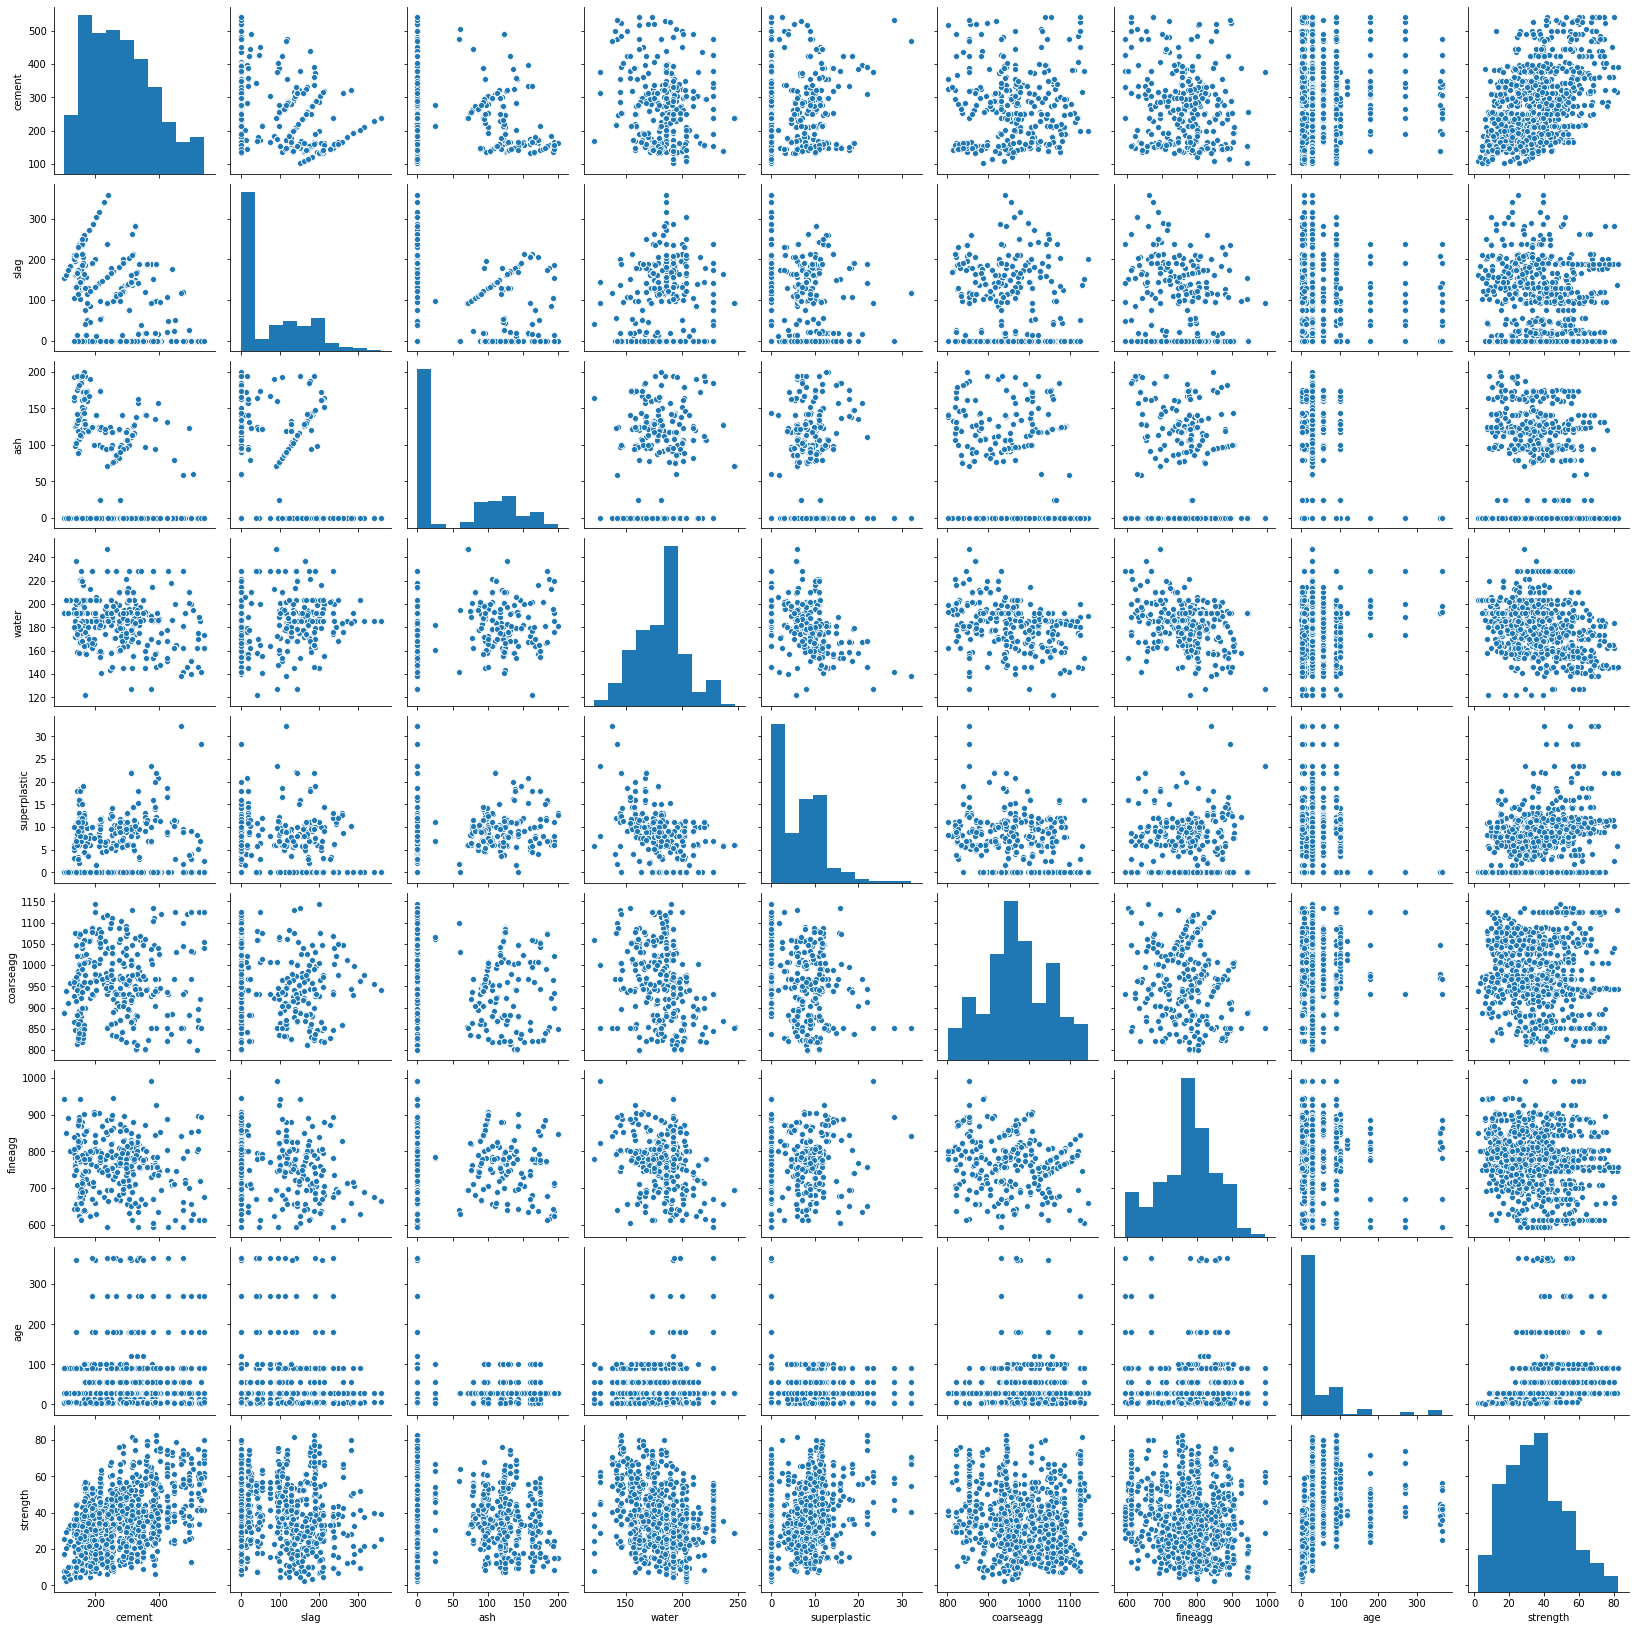

In [24]:
sns.pairplot(concrete)

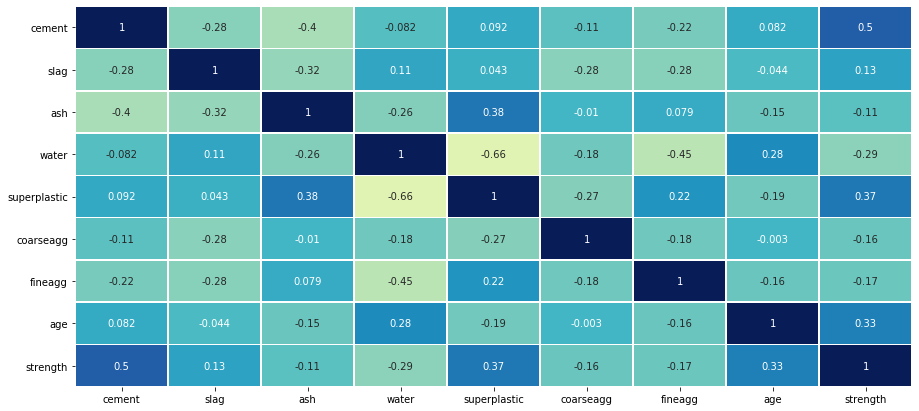

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(concrete.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

`From a combination of the heatmap and the pairplots, we can see that the values with the highest correlations with strenght are: cement, suprplastic, age, and water (although negative). We can use these fields as a starting point for feature engineering.`

## Feature Engineering

In [26]:
conc = concrete.copy()

In [27]:
conc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [28]:
# Remove extreme outliers
for i in conc.columns :
    median = conc[i].median()
    q1 = np.quantile(conc[i], 0.25)
    q3 = np.quantile(conc[i], 0.75)
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr) 
    uw = q3 + (1.5 * iqr) 
    conc[i] = np.where((conc[i] < lw) | (conc[i] > uw) , median, conc[i])

In [29]:
x = conc.drop('cement', axis=1)
y = conc[['cement']]

In [30]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
x_poly = poly.fit_transform(x)
print(x_poly.shape)

(1030, 37)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)

`We have used the Polynomial Features libraries to create attributes of degree 2 in the data set. We will then use the PCA technique together with hyper parameter tunning to find the ideal number of dimensions for each model.`

## Linear Regression

In [32]:
pca_n_components = [5, 10, 20, 37]

In [33]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("Linear Regression Training Set: ", linear_model.score(x_train, y_train))
print("Linear Regression Test Set:", linear_model.score(x_test, y_test))

Linear Regression Training Set:  0.9152319591559036
Linear Regression Test Set: 0.8534852854733556


In [35]:
ln_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA()), 
                     ('estimator', linear_model)
                   ]) 

In [36]:
ln_params = { 'pca__n_components' : pca_n_components,
             'estimator__fit_intercept':[True,False], 
             'estimator__normalize':[True,False], 
             'estimator__copy_X':[True, False]
            }
lncv = RandomizedSearchCV(ln_pipe, ln_params, cv=10, n_iter=10)

In [37]:
lncv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('estimator',
                                              LinearRegression(copy_X=True,
                   

In [38]:
print(lncv.best_params_)
print("Train accuracy", lncv.score(x_train, y_train))
print("Test accuracy", lncv.score(x_test, y_test))

{'pca__n_components': 20, 'estimator__normalize': False, 'estimator__fit_intercept': True, 'estimator__copy_X': True}
Train accuracy 0.8946047923870823
Test accuracy 0.8501070801949543


In [63]:
y_pred_base = linear_model.predict(x_test)
y_pred_tuned = lncv.predict(x_test)

linear_regression = [
    'Linear Regression',
    r2_score(y_test, y_pred_base),
    r2_score(y_test, y_pred_tuned),
    linear_model.score(x_test, y_test),
    lncv.score(x_test, y_test),
    cross_val_score(linear_model, x_test, y_test, cv = 10).mean(),
    cross_val_score(lncv, x_test, y_test, cv = 10).mean()
]

## Random Forest Regressor

In [40]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
print("Train accuracy", rf.score(x_train, y_train))
print("Test accuracy", rf.score(x_test, y_test))

Train accuracy 0.9918414246169897
Test accuracy 0.9291105801613607


In [42]:
rf_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA()), 
                     ('estimator', rf)
                   ]) 

In [43]:
rf_params = { 'pca__n_components' : pca_n_components,
              'estimator__max_depth': [10, 20, 30, 40, 50],
              'estimator__max_features': ['auto', 'sqrt'],
              'estimator__bootstrap': [True, False],
              'estimator__criterion': ["mse", "mae"]
            }
rfcv = RandomizedSearchCV(rf_pipe, rf_params, cv=10, n_iter=10)

In [44]:
rfcv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('estimator',
                                              RandomForestRegressor(bootstrap=True,
           

In [45]:
print(rfcv.best_params_)
print("Train accuracy", rfcv.score(x_train, y_train))
print("Test accuracy", rfcv.score(x_test, y_test))

{'pca__n_components': 37, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 20, 'estimator__criterion': 'mse', 'estimator__bootstrap': False}
Train accuracy 0.9999988835038687
Test accuracy 0.8696281097658869


In [64]:
y_pred_base = rf.predict(x_test)
y_pred_tuned = rfcv.predict(x_test)

random_forest = [
    'Random Forest',
    r2_score(y_test, y_pred_base),
    r2_score(y_test, y_pred_tuned),
    rf.score(x_test, y_test),
    rfcv.score(x_test, y_test),
    cross_val_score(rf, x_test, y_test, cv = 10).mean(),
    cross_val_score(rfcv, x_test, y_test, cv = 10).mean()
]

## AdaBoosting Regressor

In [47]:
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [48]:
print("Train accuracy", ab.score(x_train, y_train))
print("Test accuracy", ab.score(x_test, y_test))

Train accuracy 0.8611816898684529
Test accuracy 0.8150707635565133


In [49]:
ab_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA()), 
                     ('estimator', ab)
                   ]) 

In [50]:
ab_params = { 'pca__n_components' : pca_n_components,
              'estimator__n_estimators': [20, 50, 100],
              'estimator__learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
              'estimator__loss': ['linear', 'square', 'exponential']
            }
abcv = RandomizedSearchCV(ab_pipe, ab_params, cv=10, n_iter=10)

In [51]:
abcv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('estimator',
                                              AdaBoostRegressor(base_estimator=None,
          

In [52]:
print(abcv.best_params_)
print("Train accuracy", abcv.score(x_train, y_train))
print("Test accuracy", abcv.score(x_test, y_test))

{'pca__n_components': 10, 'estimator__n_estimators': 20, 'estimator__loss': 'square', 'estimator__learning_rate': 1}
Train accuracy 0.7958870572451805
Test accuracy 0.742497032244347


In [65]:
y_pred_base = ab.predict(x_test)
y_pred_tuned = abcv.predict(x_test)

ada_boost = [
    'AdaBoost',
    r2_score(y_test, y_pred_base),
    r2_score(y_test, y_pred_tuned),
    ab.score(x_test, y_test),
    abcv.score(x_test, y_test),
    cross_val_score(ab, x_test, y_test, cv = 10).mean(),
    cross_val_score(abcv, x_test, y_test, cv = 10).mean()
]

## Bagging Regressor

In [54]:
bg = BaggingRegressor()
bg.fit(x_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [55]:
print("Train accuracy", bg.score(x_train, y_train))
print("Test accuracy", bg.score(x_test, y_test))

Train accuracy 0.9828868938391213
Test accuracy 0.9040182912298568


In [56]:
bg_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA()), 
                     ('estimator', bg)
                   ]) 

In [57]:
bg_params = { 'pca__n_components' : pca_n_components,
              'estimator__max_samples': [0.25, 0.50, 1.0],
              'estimator__max_features': [0.25, 0.50, 1.0],
              'estimator__n_estimators': [20, 50, 100],
              'estimator__bootstrap': [True, False],
            }
bgcv = RandomizedSearchCV(bg_pipe, bg_params, cv=10, n_iter=10)

In [58]:
bgcv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('estimator',
                                              BaggingRegressor(base_estimator=None,
           

In [59]:
print(bgcv.best_params_)
print("Train accuracy", bgcv.score(x_train, y_train))
print("Test accuracy", bgcv.score(x_test, y_test))

{'pca__n_components': 37, 'estimator__n_estimators': 100, 'estimator__max_samples': 0.5, 'estimator__max_features': 1.0, 'estimator__bootstrap': False}
Train accuracy 0.9682882779501183
Test accuracy 0.8436928828803748


In [66]:
y_pred_base = bg.predict(x_test)
y_pred_tuned = bgcv.predict(x_test)

bagging = [
    'Bagging',
    r2_score(y_test, y_pred_base),
    r2_score(y_test, y_pred_tuned),
    bg.score(x_test, y_test),
    bgcv.score(x_test, y_test),
    cross_val_score(bg, x_test, y_test, cv = 10).mean(),
    cross_val_score(bgcv, x_test, y_test, cv = 10).mean()
]

## Model Comparisons and Conclusion

In [72]:
mc = pd.DataFrame(columns=['model', 'r2_base', 'r2_tuned', 'accuracy_base', 'accuracy_tuned', 'KCV_base', 'KCV_tuned'])
mc.loc[0] = linear_regression
mc.loc[1] = random_forest
mc.loc[2] = ada_boost
mc.loc[3] = bagging

In [73]:
mc

,model,r2_base,r2_tuned,accuracy_base,accuracy_tuned,KCV_base,KCV_tuned
0,Linear Regression,0.85,0.85,0.85,0.85,0.73,0.76
1,Random Forest,0.93,0.87,0.93,0.87,0.80,0.81
2,AdaBoost,0.82,0.74,0.82,0.74,0.72,0.71
3,Bagging,0.90,0.84,0.90,0.84,0.75,0.73


We have created several models that predict the strength of cement based on several different combinations of existing fields with polynomial features. In addition, models have been tuned for efficiency and complexity reduction. Out of all the models, Random Forest performed the best, with the rest of the models being a bit more inconsistent on each different score.

In addition to the methods implemented in this script, we could keep trying more algorithms, elevate polynomial degree to 3, use other feature engineering techniques to drop irrelevant columns, amongst others.

